# **전자상거래 배송 데이터 분석하기**

(Section1 초점 => 시각화, 가설검정)

**회사의 목적(이익 추구) + 긍정적인 이미지**

이익 창출

1. 많이 팔리는 상품
2. 가격이 높은 상품 + 상품의 중요성이 높은 상품(뭔가 회사의 identity?를 나타낼 수 있다고 생각)

아무리 뛰어난 상품을 판다해도 회사 이미지가 좋지 않다면 소용이 없다.

-> 그렇다면 어떻게 하면 긍정적인 회사 이미지를 보여줄 수 있을까?

1. 제 시간에 도착하는 상품
2. 평가가 좋았던 상품
3. 배송 문의 전화가 덜 왔던 상품

# **<데이터 업로드>**

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [2]:
!pip install pandas-profiling==3.1.0

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [4]:
import pandas as pd
import io
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rc('font', family='NanumBarunGothic') 

In [60]:
data = pd.read_csv(io.StringIO(uploaded['Train.csv'].decode('utf8')))
data = data.drop(['ID'], axis = 1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [61]:
data.info() #결측치 없음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [62]:
profile = ProfileReport(data, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **<칼럼별 상관관계>**

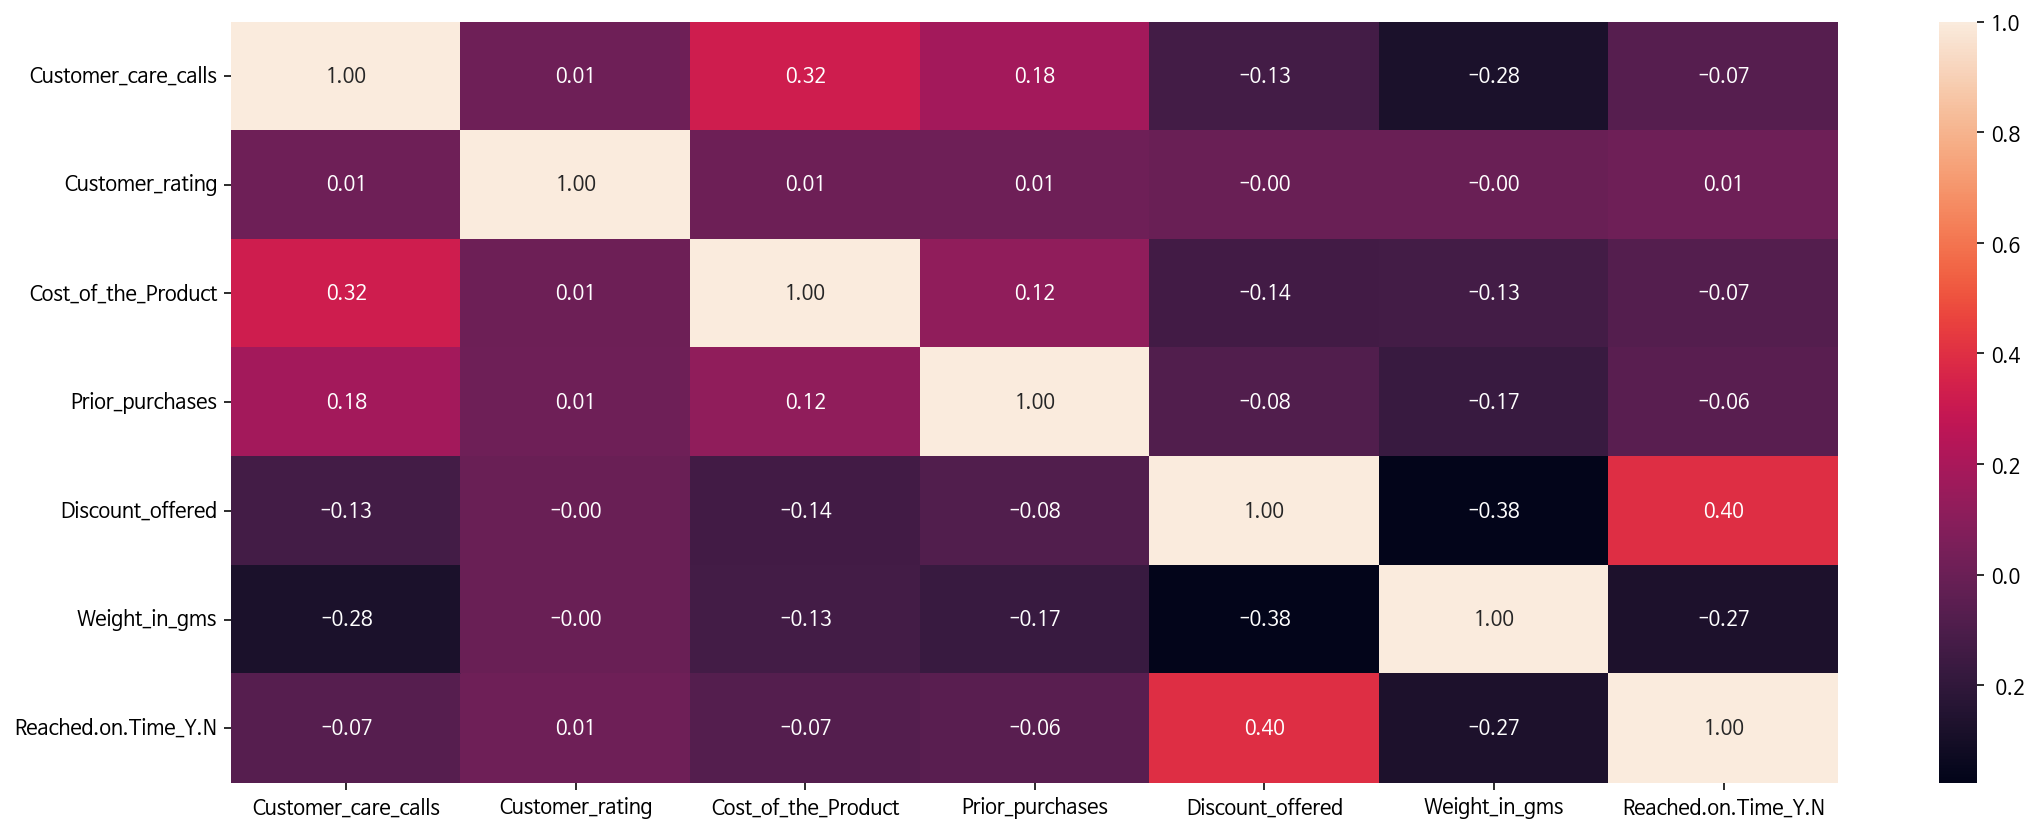

In [63]:
plt.figure(figsize = (18, 7))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')
plt.show()

* ***양의 상관관계 40%*** Discount_offered - Reached on Time_YN 
* ***양의 상관관계 32%*** Cost_of_the_Product - Customer_care_calls 
* ***음의 상관관계 38%*** Discount_offered - Weight_in_gms 
* ***음의 상관관계 28%*** Customer_care_calls - Weight_in_gms 
* ***음의 상관관계 27%*** Reached on Time_YN - Weight_in_gms 


# **<Categorical 컬럼 분석>**

## **창고 블럭**

In [64]:
data['Warehouse_block'].value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

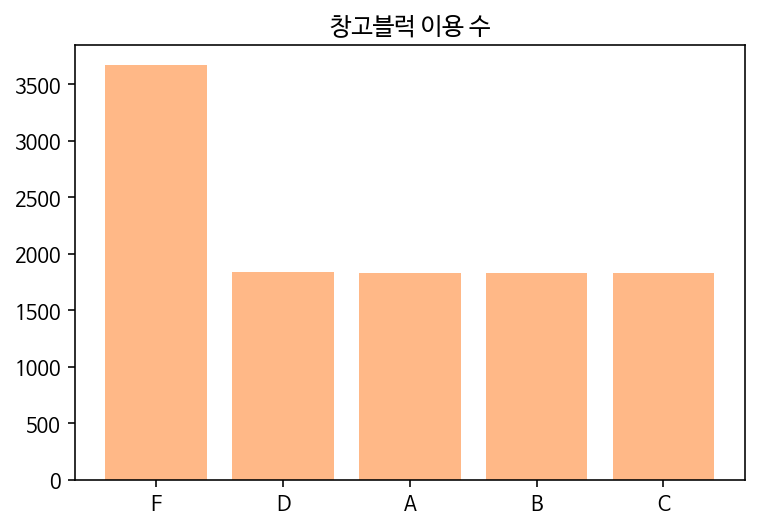

In [163]:
plt.bar(data['Warehouse_block'].value_counts().index, data['Warehouse_block'].value_counts(), color = "#FFB887")
plt.title("창고블럭 이용 수")
plt.show()

Text(0.5, 1.0, '창고블럭 이용률')

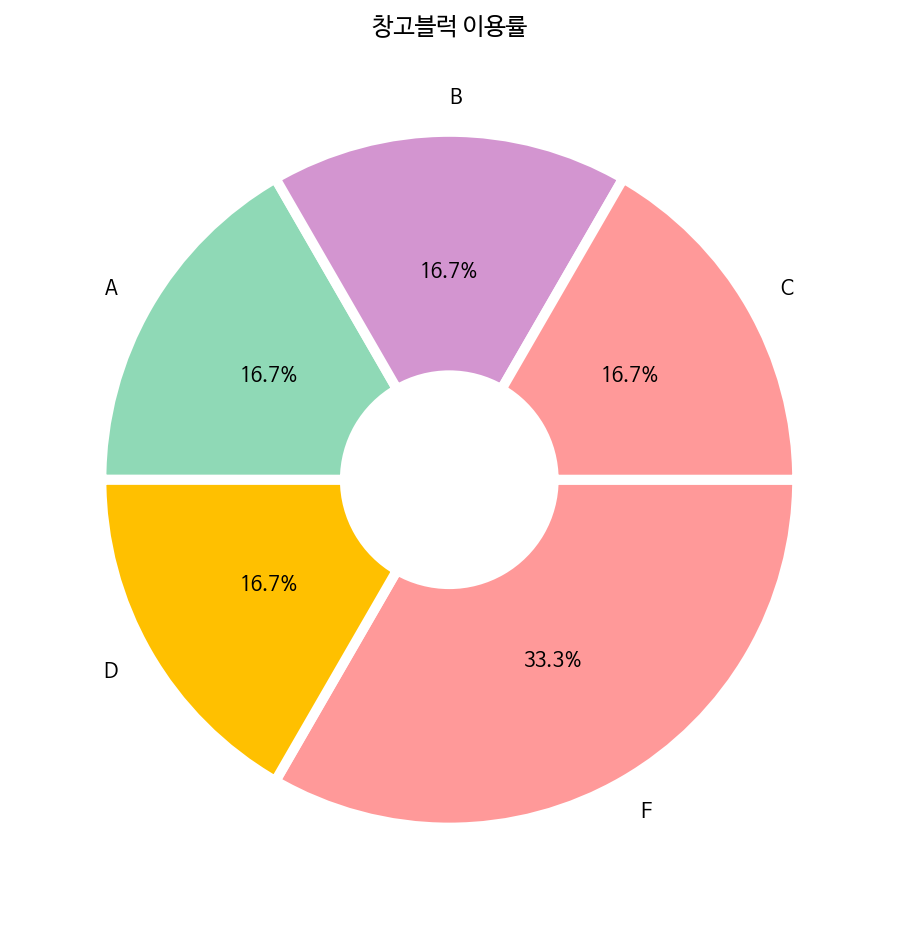

In [66]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Warehouse_block'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("창고블럭 이용률")

* **f 창고 블럭** 타 창고 블럭에 비해 확연히 많이 이용

## **배송 방법**

In [67]:
data['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

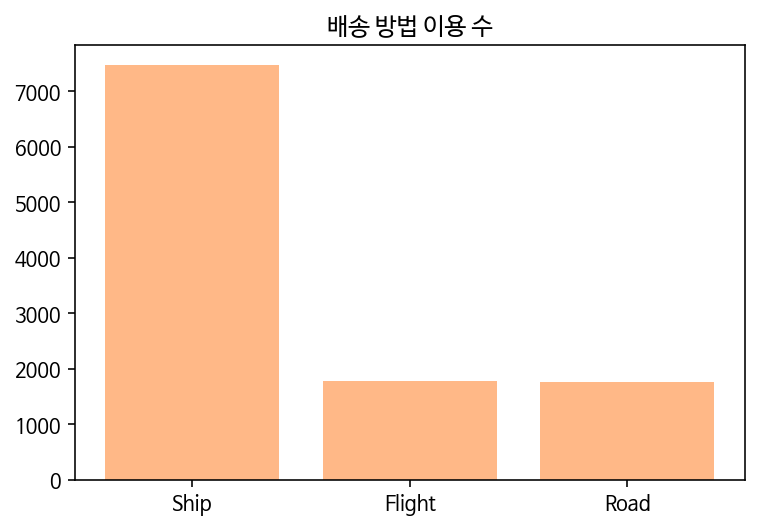

In [164]:
plt.bar(data['Mode_of_Shipment'].value_counts().index, data['Mode_of_Shipment'].value_counts(), color = "#FFB887")
plt.title("배송 방법 이용 수")
plt.show()

Text(0.5, 1.0, '배송 방법 이용률')

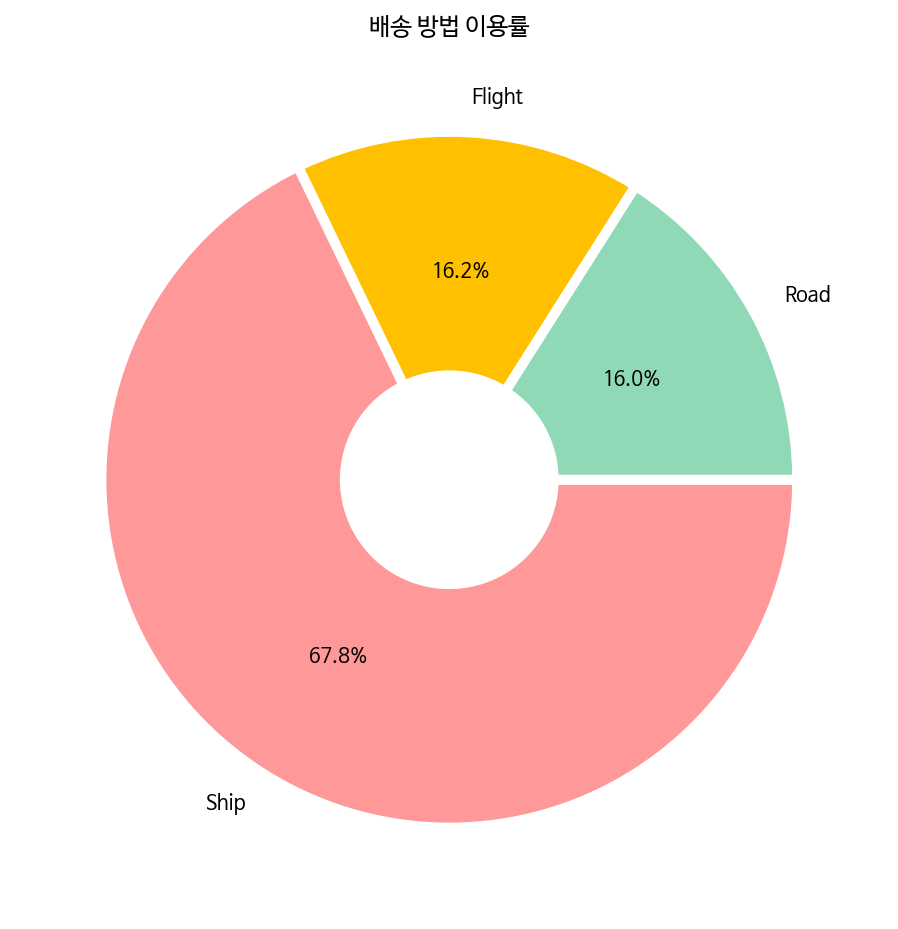

In [69]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Mode_of_Shipment'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("배송 방법 이용률")

* **ship 배송법** 타 배송 방법에 비해 뚜렷하게 많다.

## **고객 배송 문의 전화**

In [70]:
data['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

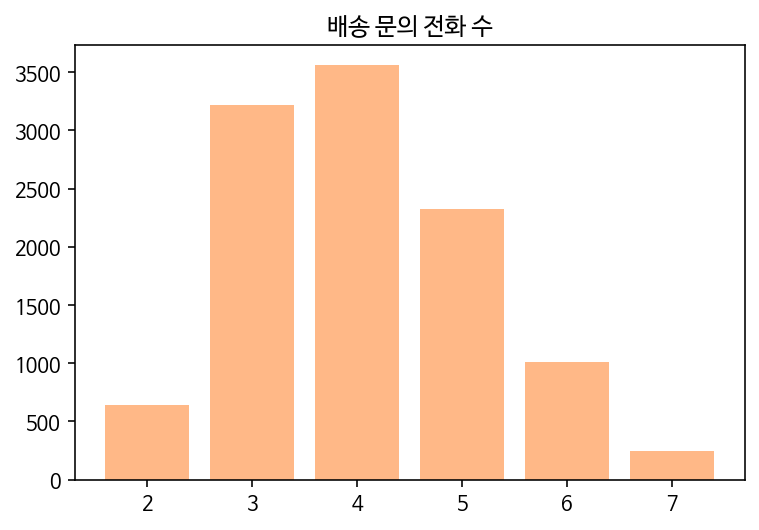

In [165]:
plt.bar(data['Customer_care_calls'].value_counts().index, data['Customer_care_calls'].value_counts(), color = "#FFB887")
plt.title("배송 문의 전화 수")
plt.show()

Text(0.5, 1.0, '배송 문의 전화율')

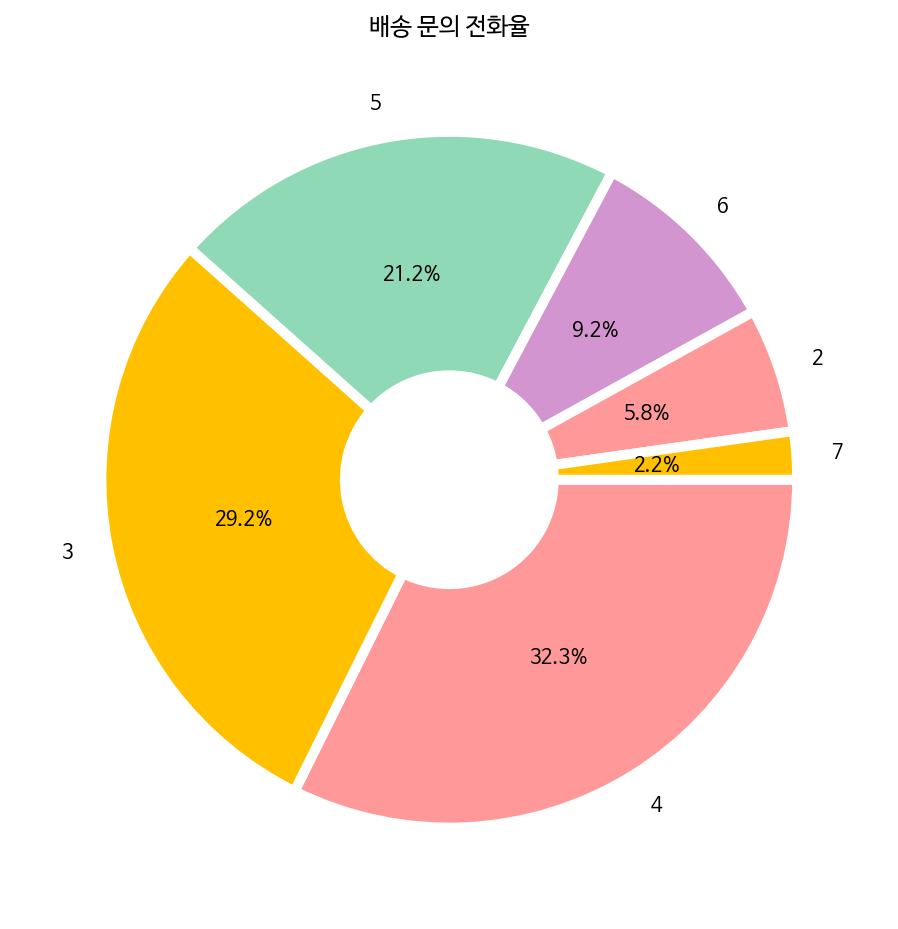

In [72]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Customer_care_calls'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("배송 문의 전화율")

* 고객 배송 문의 전화 **4번** 다수

## **고객 평가**

In [73]:
data['Customer_rating'].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

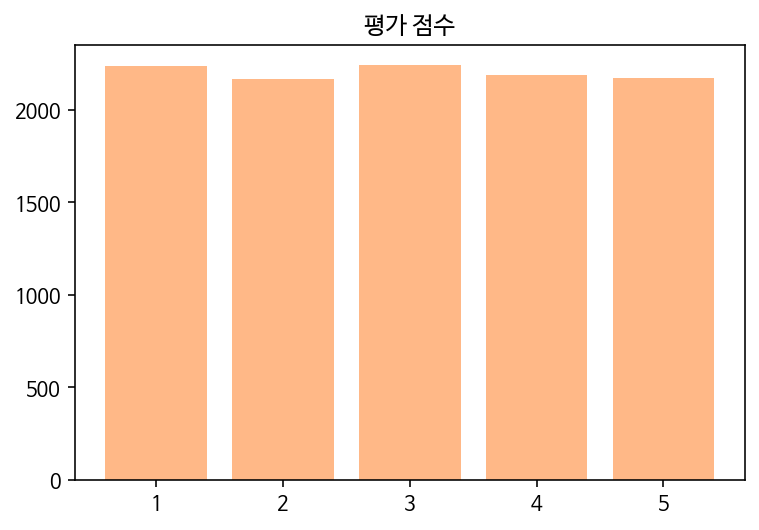

In [166]:
plt.bar(data['Customer_rating'].value_counts().index, data['Customer_rating'].value_counts(), color = "#FFB887")
plt.title("평가 점수")
plt.show()

Text(0.5, 1.0, '평가 점수 비율')

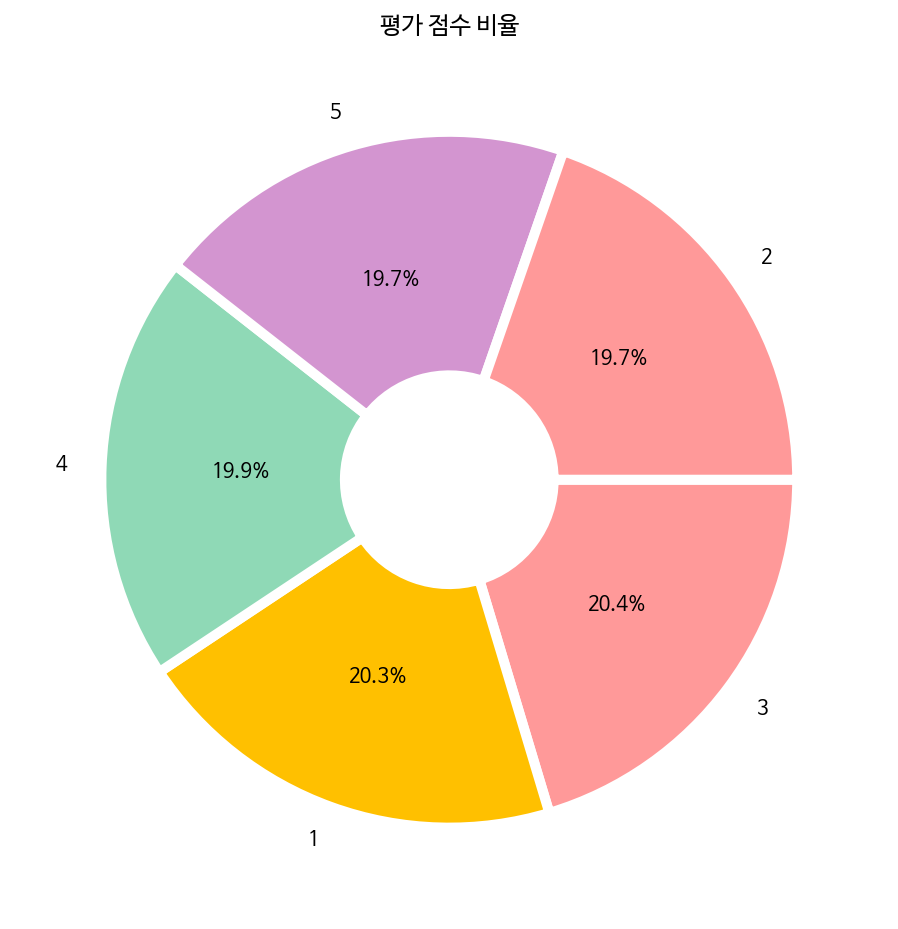

In [75]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Customer_rating'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("평가 점수 비율")

* 거의 **다 비슷비슷**

## **이전 구매 이력**

In [76]:
data['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

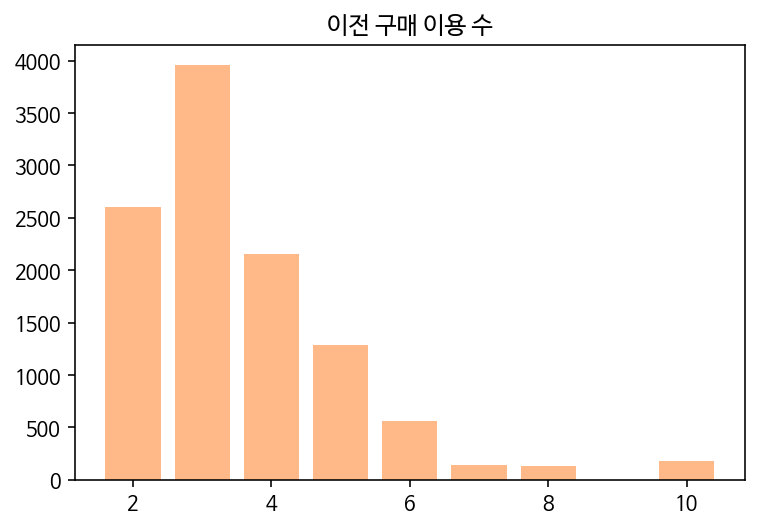

In [167]:
plt.bar(data['Prior_purchases'].value_counts().index, data['Prior_purchases'].value_counts(), color = "#FFB887")
plt.title("이전 구매 이용 수")
plt.show()

Text(0.5, 1.0, '이전 구매 이용률')

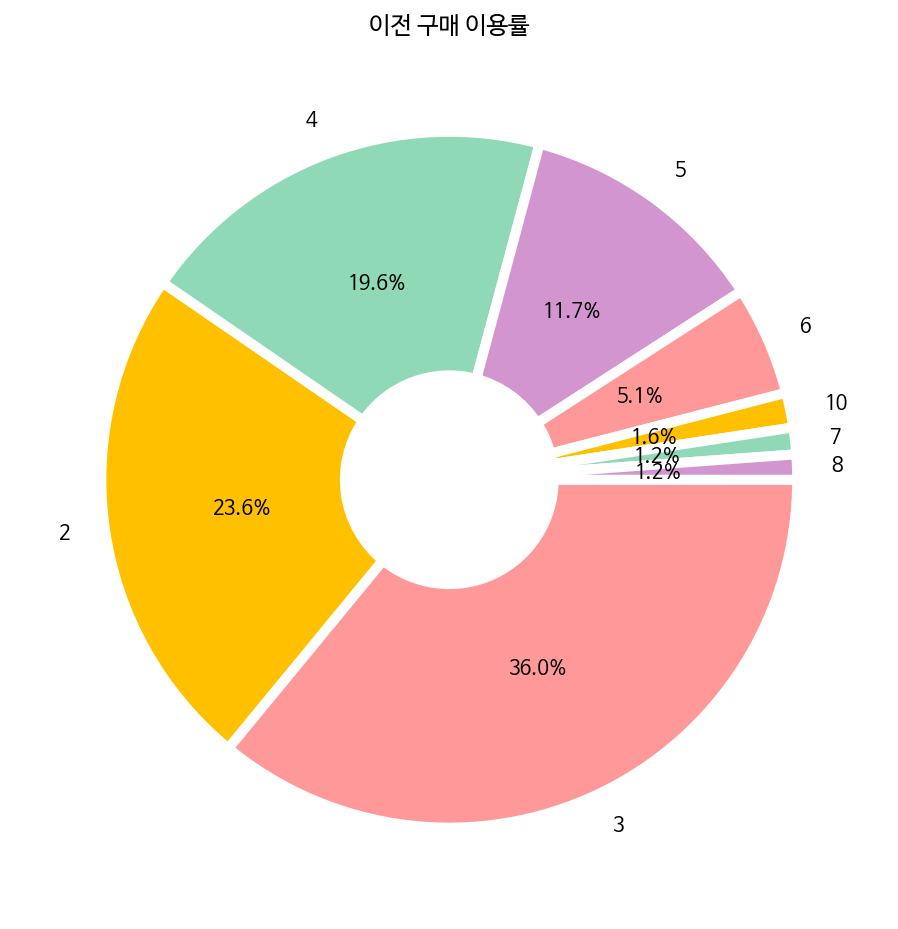

In [78]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Prior_purchases'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("이전 구매 이용률")

* 보통 **3번 정도 구매이력**이 있다.

## **상품 중요도**

In [79]:
data['Product_importance'].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

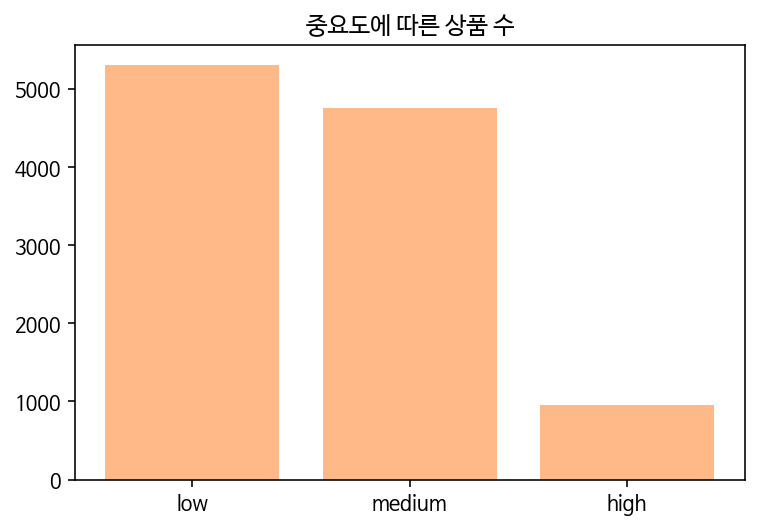

In [171]:
plt.bar(data['Product_importance'].value_counts().index, data['Product_importance'].value_counts(), color = "#FFB887")
plt.title("중요도에 따른 상품 수")
plt.show()

Text(0.5, 1.0, '중요도에 따른 상품 비율')

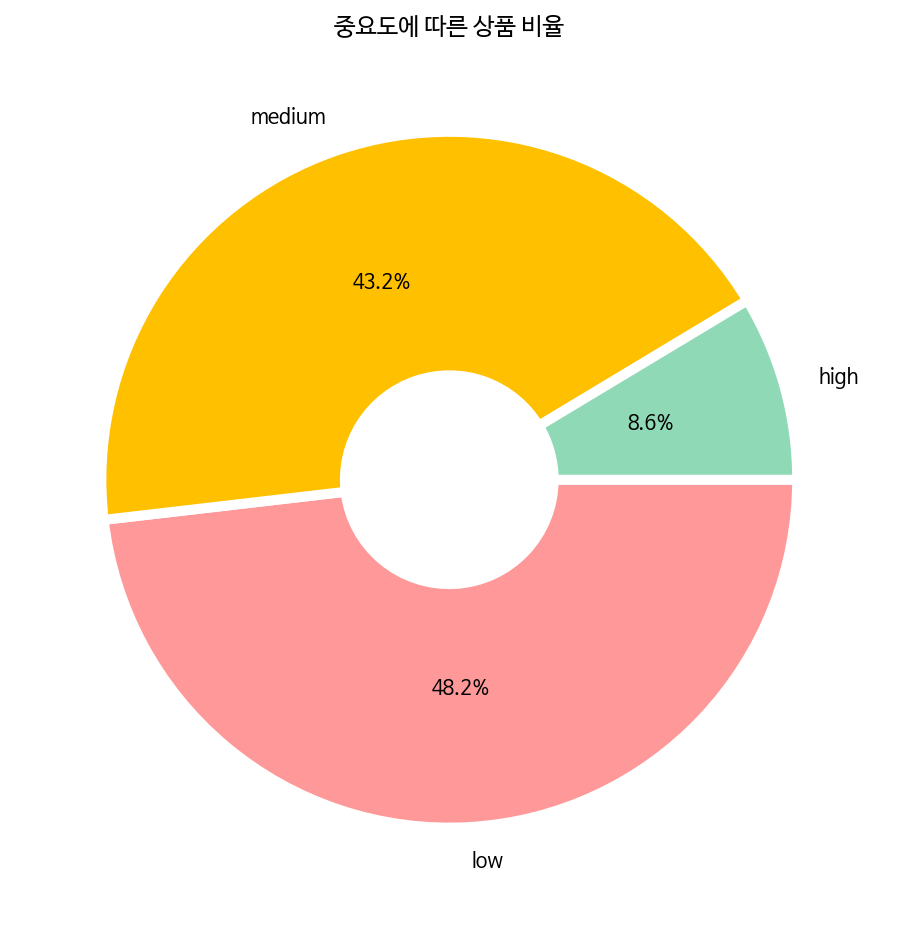

In [81]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Product_importance'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("중요도에 따른 상품 비율")

* 상품들의 **중요도가 낮다**

## **성별**

In [82]:
data['Gender'].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

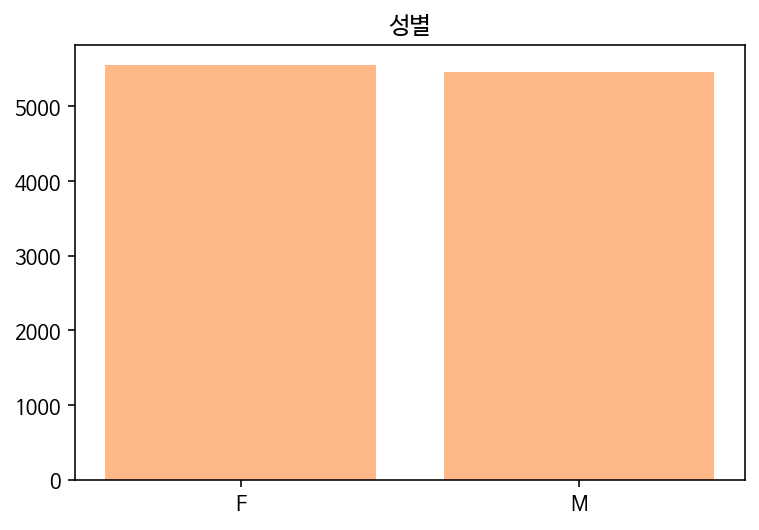

In [172]:
plt.bar(data['Gender'].value_counts().index, data['Gender'].value_counts(), color = "#FFB887")
plt.title("성별")
plt.show()

Text(0.5, 1.0, '성별 비율')

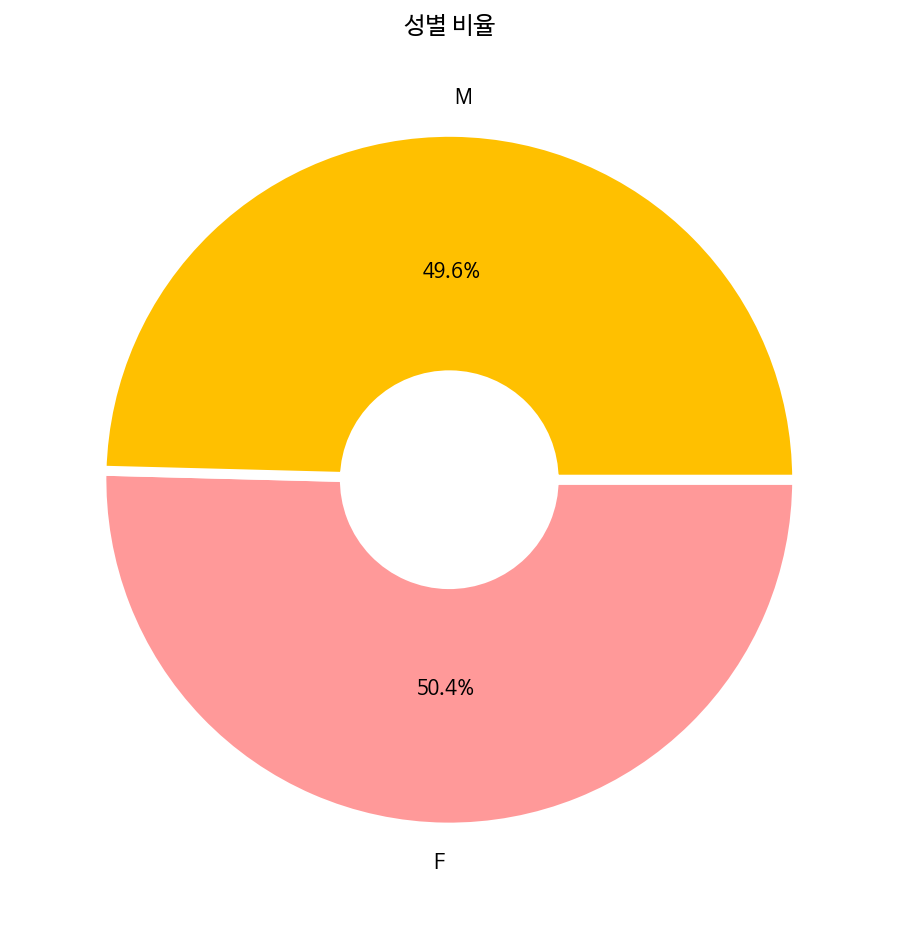

In [84]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Gender'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("성별 비율")

* **성별의 비율은 차이가 없다.**

## **제 시간에 도착하는지 여부**

In [85]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

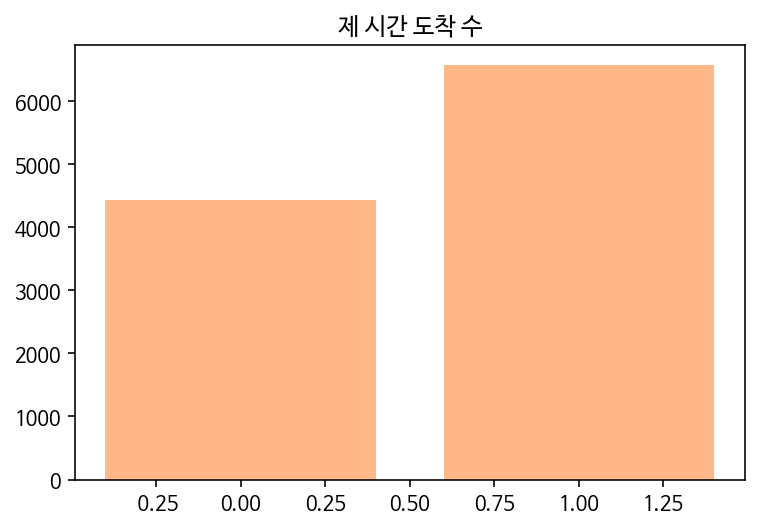

In [173]:
plt.bar(data['Reached.on.Time_Y.N'].value_counts().index, data['Reached.on.Time_Y.N'].value_counts(), color = "#FFB887")
plt.title("제 시간 도착 수")
plt.show()

Text(0.5, 1.0, '제 시간 도착률')

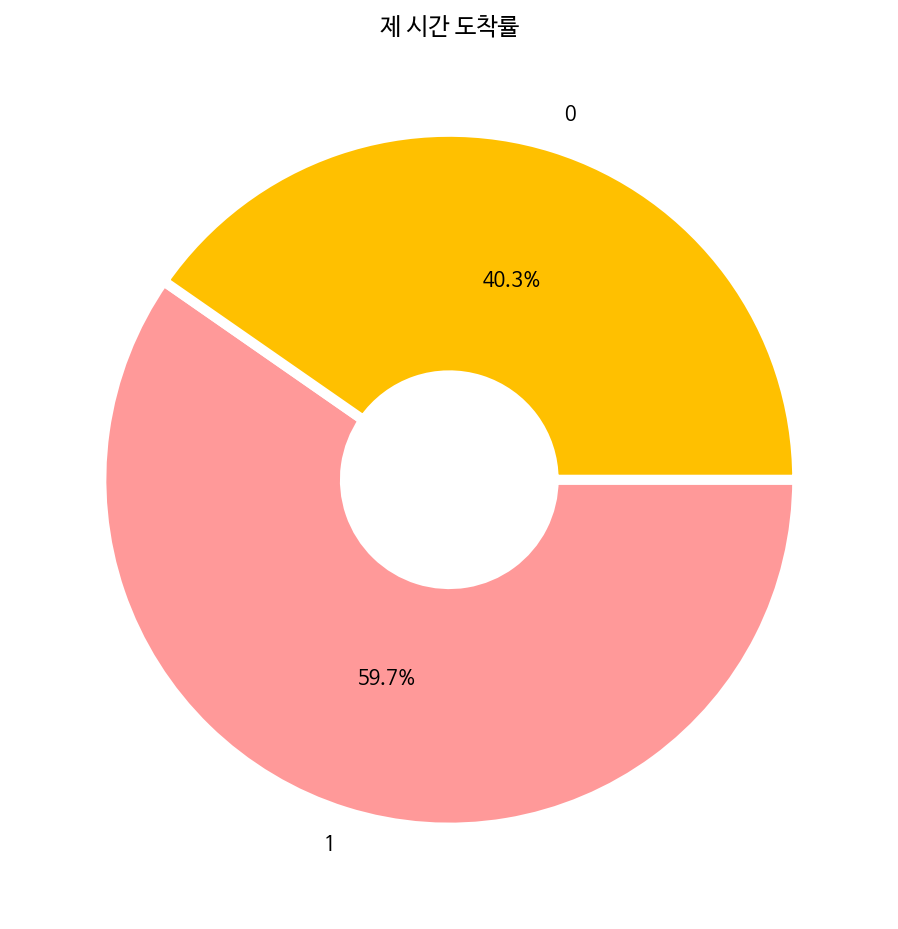

In [87]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
data['Reached.on.Time_Y.N'].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], counterclock = False, wedgeprops = wedgeprops)
plt.ylabel("")
plt.title("제 시간 도착률")

* **대부분 제시간에 도착하지 않았다.**

# **<상관관계가 높은 칼럼 비교>**

## <Discount_offered - Reached.on.Time_Y.N>

Text(0.5, 1.0, '할인 수에 따른 제 시간 도착 여부')

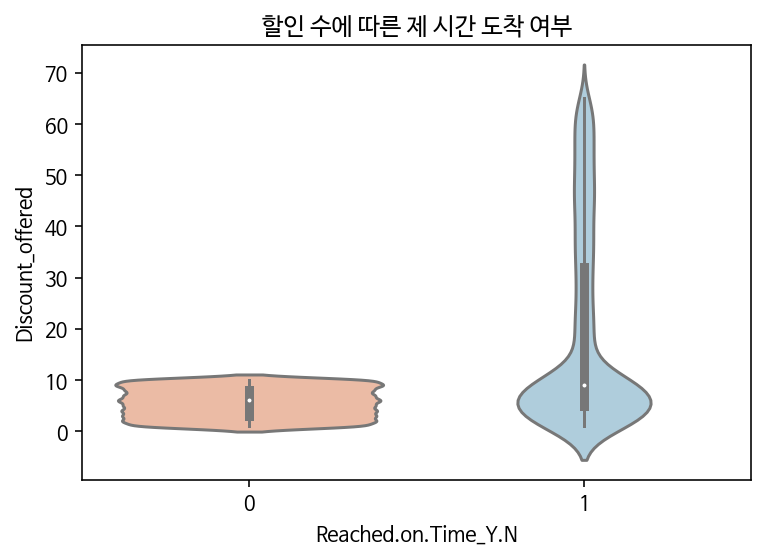

In [88]:
sns.violinplot(data = data, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', palette = "RdBu")
plt.title("할인 수에 따른 제 시간 도착 여부")

***=> 할인을 더 제공받을수록 제 시간에 도착하지 않는다.***

***=> 할인을 적게 받아도 제 시간에 도착하지 않기도 한다.***

In [89]:
data.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()

Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

***=> 할인을 더 제공받을수록 제 시간에 도착하지 않는다.***

why,,,?

## <Cost_of_the_Product - Customer_care_calls>

Text(0.5, 1.0, '상품 가격에 따른 고객 배송 문의 전화 수')

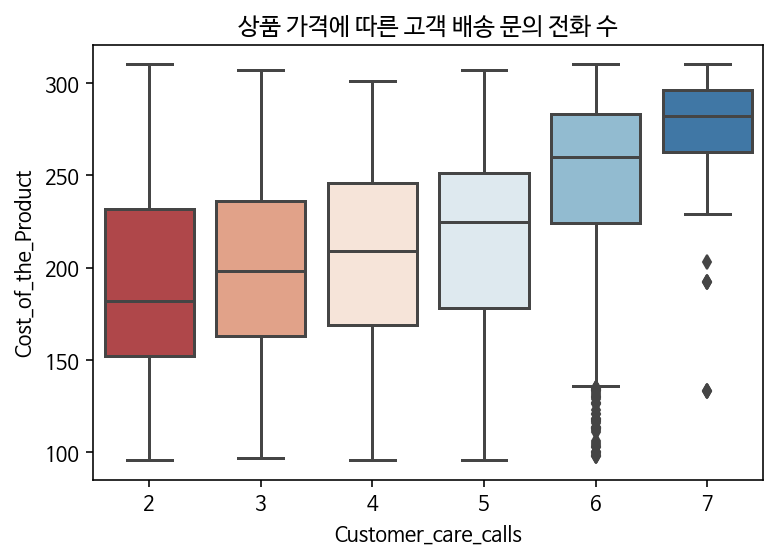

In [90]:
sns.boxplot(data = data, x = 'Customer_care_calls', y = 'Cost_of_the_Product', palette = "RdBu")
plt.title("상품 가격에 따른 고객 배송 문의 전화 수")

***=> 고객은 상품이 비싸든 안 비싸든 배송 문의 전화를 몇번이고 한다.***

***=> 고객은 상품이 비쌀수록 배송 문의 전화를 더 많이 한다.***

In [91]:
data.groupby('Customer_care_calls')['Cost_of_the_Product'].mean()

Customer_care_calls
2    189.888715
3    198.876904
4    206.396964
5    214.328608
6    246.478776
7    277.337398
Name: Cost_of_the_Product, dtype: float64

Text(0.5, 1.0, '제 시간 도착 여부별 상품 가격에 따른 고객 배송 문의 전화 수')

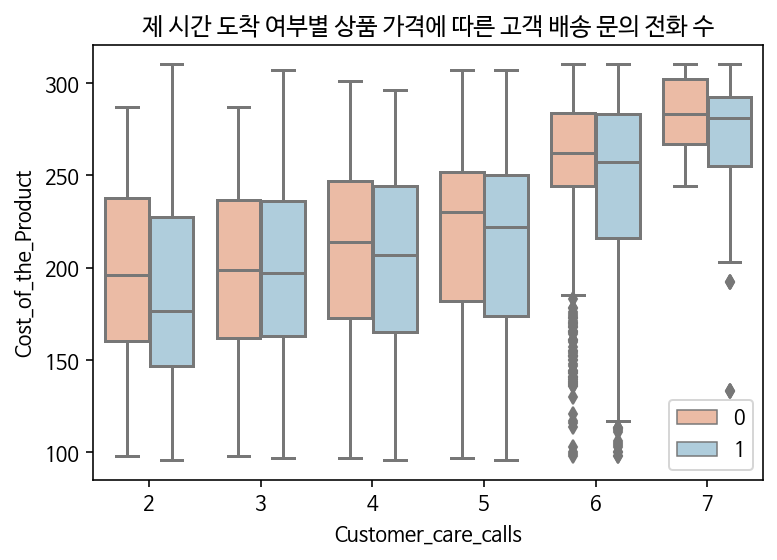

In [92]:
sns.boxplot(data = data, x = 'Customer_care_calls', y = 'Cost_of_the_Product', hue = 'Reached.on.Time_Y.N', palette = 'RdBu')
plt.legend(loc = 'lower right')
plt.title("제 시간 도착 여부별 상품 가격에 따른 고객 배송 문의 전화 수")

***=> 제 시간에 상품이 도착하든 안하든, 고객은 상품의 가격이 비쌀수록 배송 문의 전화를 더 많이 한다.***

## <Discount_offered - Weight_in_gms>


Text(0.5, 1.0, '무게에 따른 할인 제공 수')

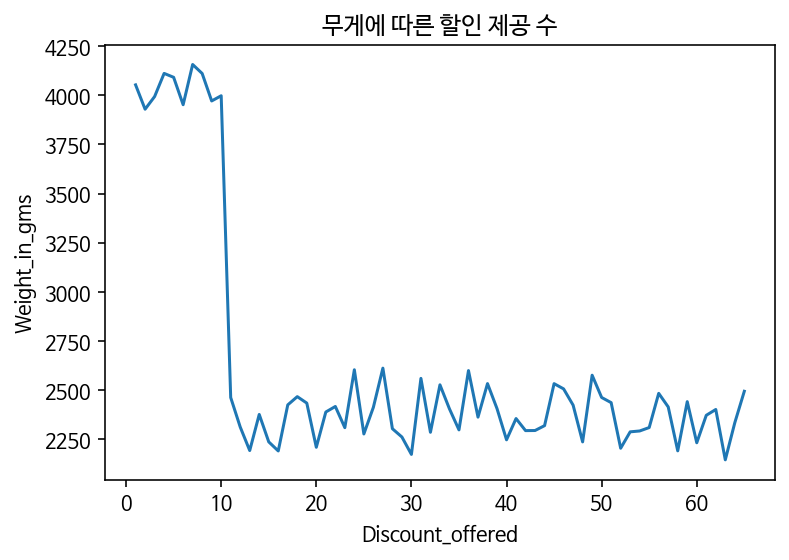

In [162]:
sns.lineplot(data = data, x = 'Discount_offered', y = 'Weight_in_gms', palette = "RdBu", ci = None)
plt.title("무게에 따른 할인 제공 수")

***=> 무게가 가벼울수록 할인을 더 제공받는다.***

***=> 무게가 무거울수록 할인을 덜 제공받는다.***

## <Customer_care_calls - Weight_in_gms>

Text(0.5, 1.0, '무게에 따른 고객 배송 문의 전화 수')

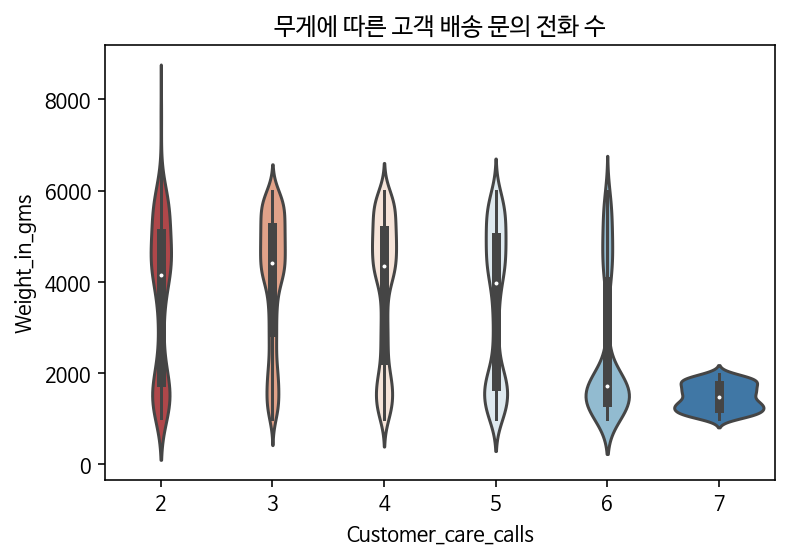

In [94]:
sns.violinplot(data = data, x = 'Customer_care_calls', y = 'Weight_in_gms', palette = "RdBu")
plt.title("무게에 따른 고객 배송 문의 전화 수") 

***=> 고객은 상품의 무게가 적게 나갈수록 배송 문의 전화를 많이 한다(잃어버릴 가능성,,?)***


## <Reached on Time_YN - Weight_in_gms>

Text(0.5, 1.0, '무게에 따른 제 시간 도착 여부')

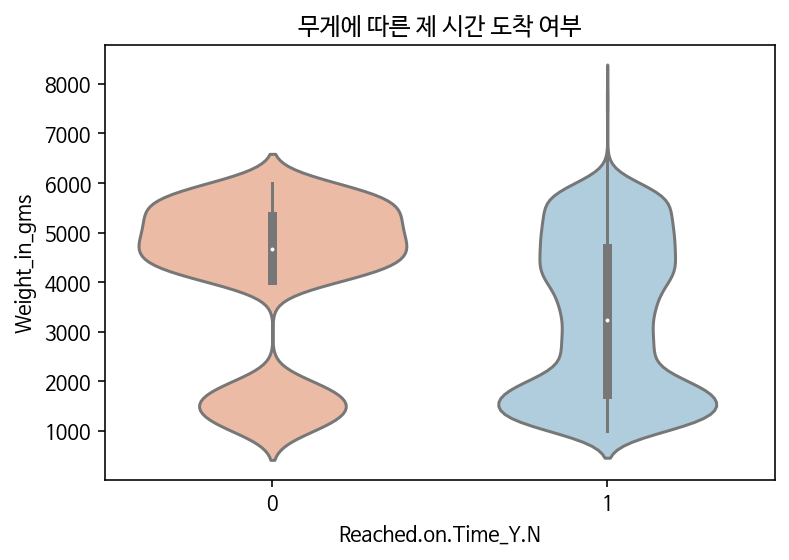

In [95]:
sns.violinplot(data = data, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', palette = "RdBu")
plt.title("무게에 따른 제 시간 도착 여부")

***=> 상품의 무게가 커도 제 시간 안에 도착한다.***

***=> 상품의 무게가 작아도 제 시간 안에 도착하지 못한다.***

# **<의식의 흐름 질문>**

## 어떤 유형의 창고에 중량이 몰려 있을까?

---



In [96]:
data.groupby('Warehouse_block')['Weight_in_gms'].sum()

Warehouse_block
A     6627118
B     6664240
C     6674560
D     6655305
F    13349327
Name: Weight_in_gms, dtype: int64

Text(0.5, 1.0, '창고블럭별 상품 중량 수')

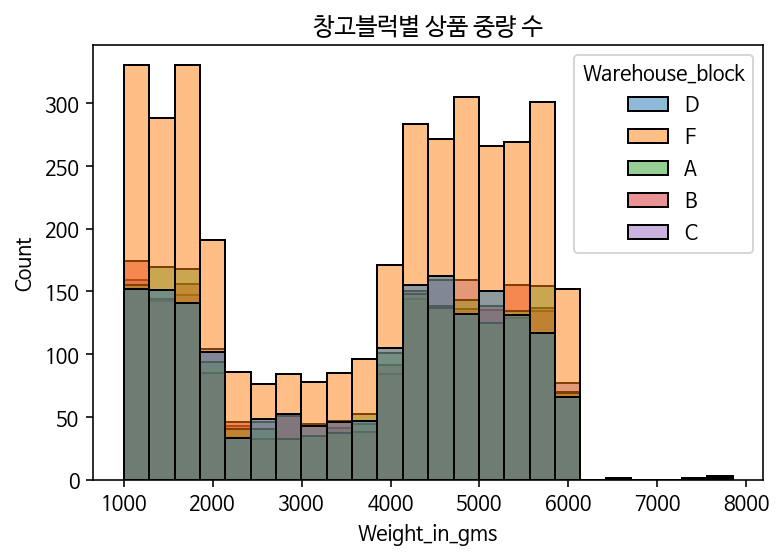

In [97]:
sns.histplot(data = data, x = 'Weight_in_gms', hue = 'Warehouse_block')
plt.title("창고블럭별 상품 중량 수")

***=> F 창고 블럭에 중량이 몰려 있다.***

## 어떤 배송 방법이 가장 많은 무게를 배송할까?

In [98]:
data.groupby('Mode_of_Shipment')['Weight_in_gms'].sum()

Mode_of_Shipment
Flight     6449405
Road       6423209
Ship      27097936
Name: Weight_in_gms, dtype: int64

Text(0.5, 1.0, '배송 방법별 상품 중량 수')

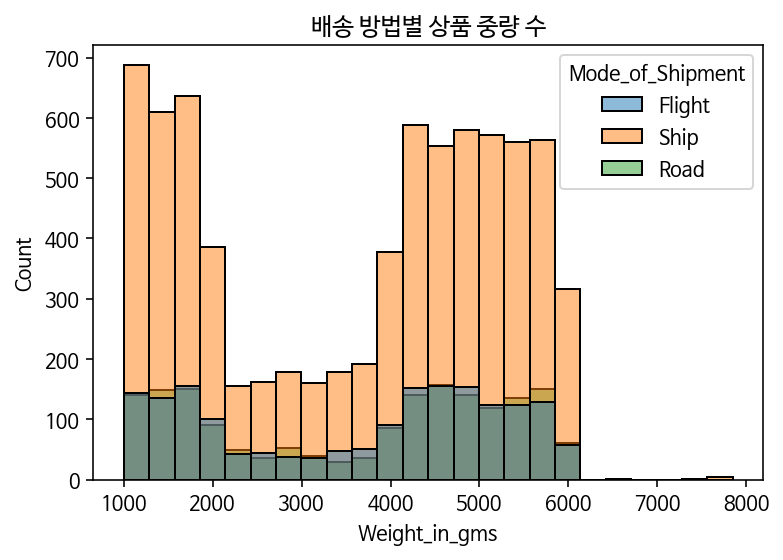

In [99]:
sns.histplot(data = data, x = 'Weight_in_gms', hue = 'Mode_of_Shipment')
plt.title("배송 방법별 상품 중량 수")

***=> 배로 가장 많은 중량을 배송한다.***

## 고객 배송 문의 전화가 고객평가에 영향이 있을까?

In [100]:
data.groupby('Customer_care_calls')['Customer_rating'].mean()

Customer_care_calls
2    3.017241
3    2.959901
4    2.998032
5    2.972938
6    3.083909
7    2.995935
Name: Customer_rating, dtype: float64

Text(0.5, 1.0, '고객 평가 점수에 따른 고객 배송 문의 전화 수')

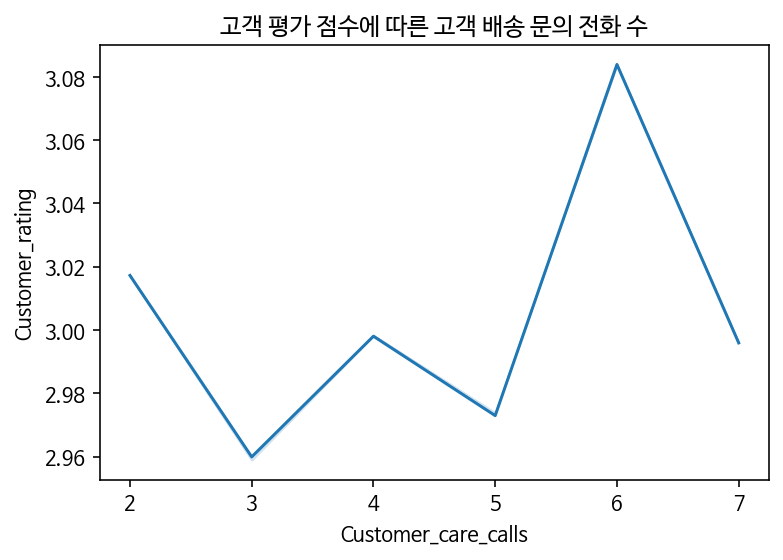

In [125]:
sns.lineplot(data = data, x = 'Customer_care_calls', y = 'Customer_rating', palette = "RdBu", ci = 0)
plt.title("고객 평가 점수에 따른 고객 배송 문의 전화 수")

***=> 고객은 배송 문의 전화 수와 상관없이 3점 정도의 평가를 남긴다***

## 성별이 고객 평가에 영향이 있을까?

In [102]:
data.groupby('Gender')['Customer_rating'].mean()

Gender
F    2.986655
M    2.994499
Name: Customer_rating, dtype: float64

Text(0.5, 1.0, '성별에 따른 고객 평가 점수')

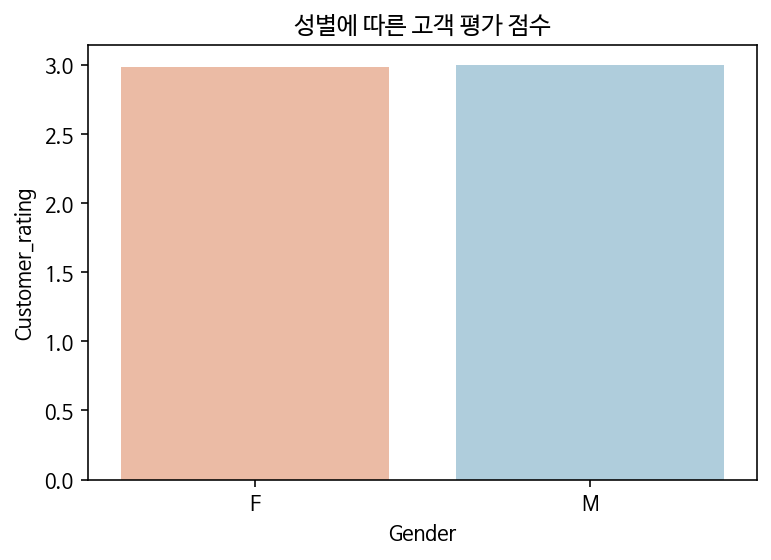

In [127]:
sns.barplot(data = data, x = 'Gender', y = 'Customer_rating', palette = "RdBu", ci = 0)
plt.title("성별에 따른 고객 평가 점수")

***=> 고객 배송 문의 전화는 성별에 큰 영향이 없다.***

## 제 시간 도착 여부가 고객 평가에 영향이 있을까?

In [104]:
data.groupby('Reached.on.Time_Y.N')['Customer_rating'].mean()

Reached.on.Time_Y.N
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64

Text(0.5, 1.0, '제 시간 도착 여부에 따른 고객 평가 점수')

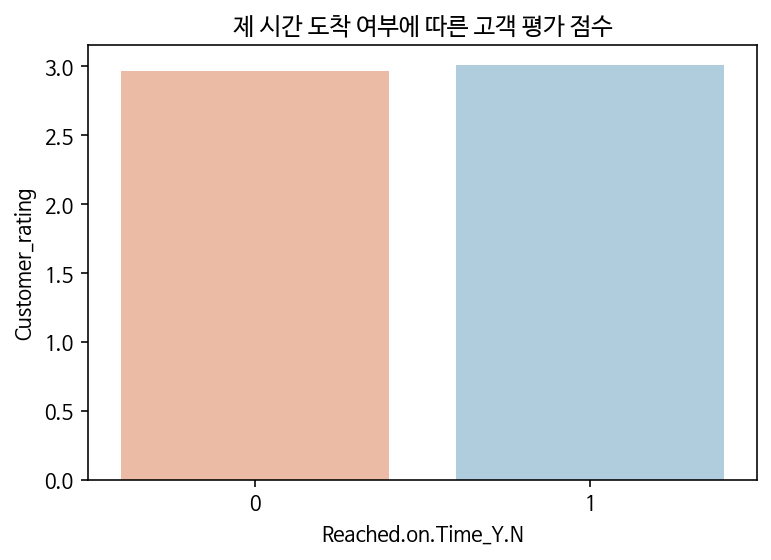

In [105]:
sns.barplot(data = data, x = 'Reached.on.Time_Y.N', y = 'Customer_rating', palette = "RdBu", ci = 0)
plt.title("제 시간 도착 여부에 따른 고객 평가 점수")

***=> 제 시간에 도착하든 안하든 보통 3점을 준다.***

Text(0.5, 1.0, '제 시간 도착 여부에 따른 고객 평가 점수')

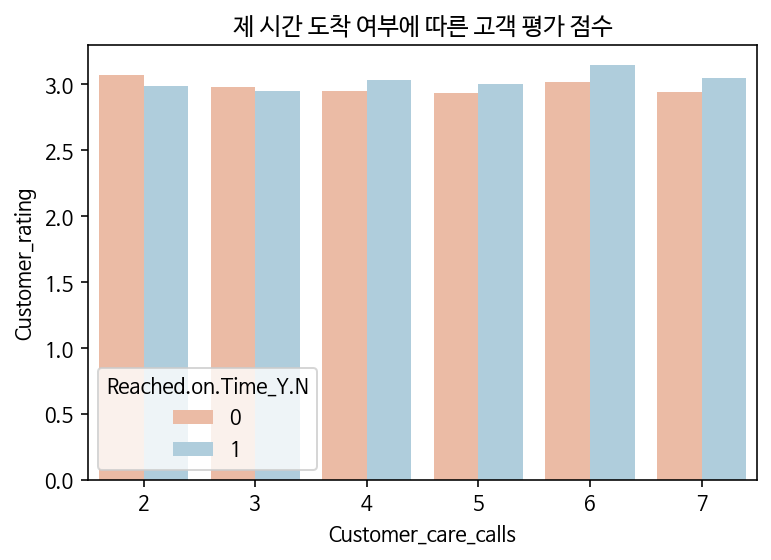

In [106]:
sns.barplot(data = data, x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Reached.on.Time_Y.N', palette = 'RdBu', ci = 0)
plt.title("제 시간 도착 여부별 고객 배송 문의 전화에 따른 고객 평가 점수")

## 상품 가격이 창고 블럭에 영향이 있을까?

In [107]:
data.groupby('Warehouse_block')['Cost_of_the_Product'].sum()

Warehouse_block
A    382671
B    388888
C    387114
D    386805
F    766477
Name: Cost_of_the_Product, dtype: int64

Text(0.5, 1.0, '창고 블럭별 상품 가격 수')

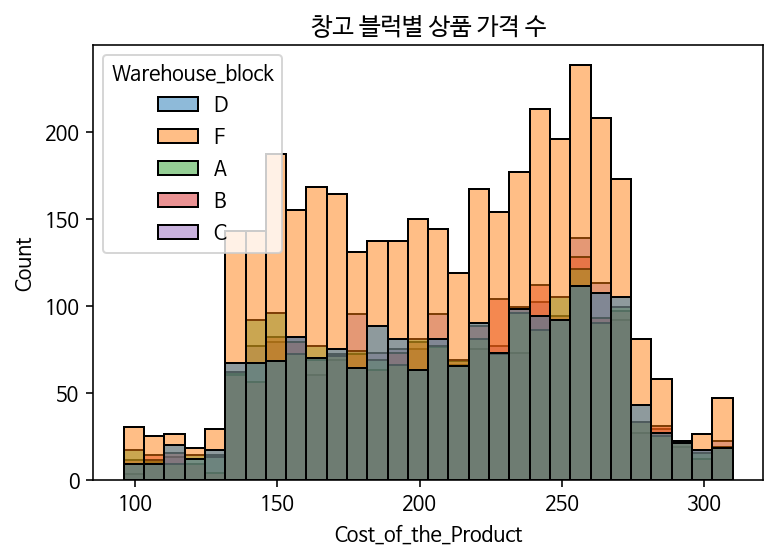

In [108]:
sns.histplot(data = data, x = 'Cost_of_the_Product', hue = 'Warehouse_block')
plt.title("창고 블럭별 상품 가격 수")

=> ***F 창고에 많은 비용(아무래도 f창고 이용률이나 무거운 상품 때문에,,?!)이 몰려 있다.***

## 상품 가격이 배송 방법에 영향이 있을까?

In [111]:
data.groupby('Mode_of_Shipment')['Cost_of_the_Product'].sum()

Mode_of_Shipment
Flight     371938
Road       370437
Ship      1569580
Name: Cost_of_the_Product, dtype: int64

Text(0.5, 1.0, '배송 방법별 상품 가격 수')

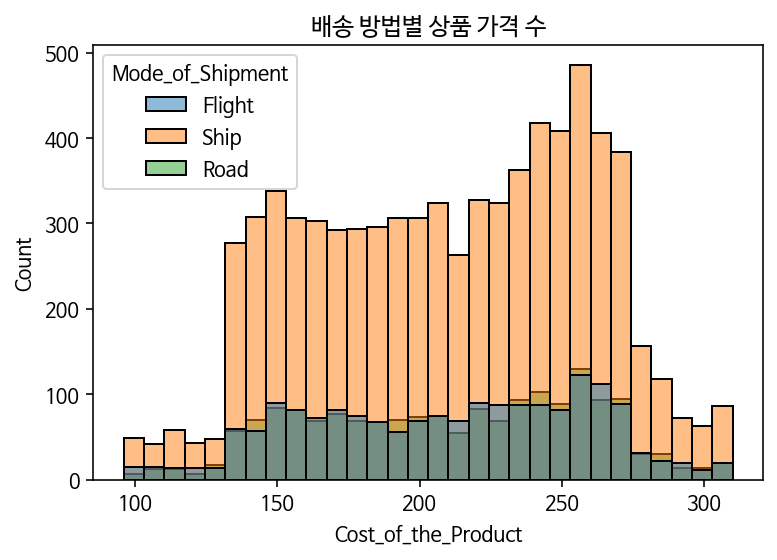

In [113]:
sns.histplot(data = data, x = 'Cost_of_the_Product', hue = 'Mode_of_Shipment')
plt.title("배송 방법별 상품 가격 수")

***=> ship에 많은 비용(많은 이용과 많은 상품 수 때문인지)이 몰려 있다.***

## 배송방법이 평가에 영향이 있을까?

In [114]:
data.groupby('Mode_of_Shipment')['Customer_rating'].mean()

Mode_of_Shipment
Flight    2.982555
Road      2.995455
Ship      2.991289
Name: Customer_rating, dtype: float64

Text(0.5, 1.0, '배송방법에 따른 고객 평가 점수')

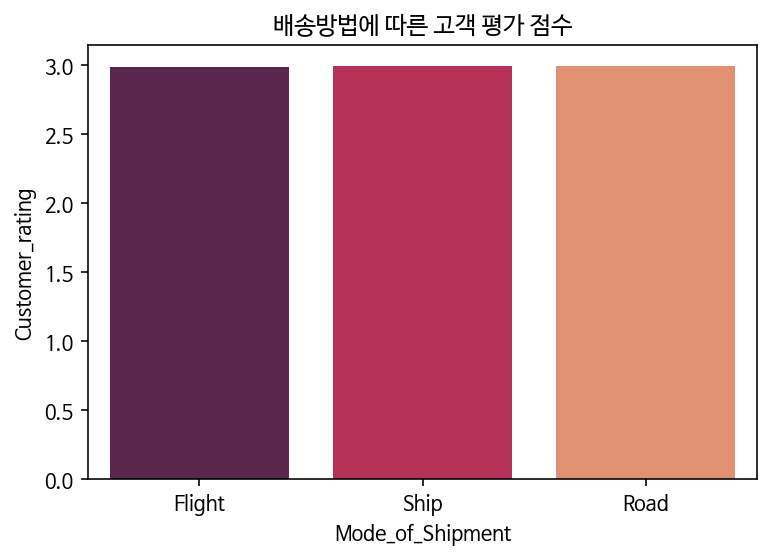

In [121]:
sns.barplot(data = data, x = 'Mode_of_Shipment', y = 'Customer_rating', palette = "rocket", ci = 0)
plt.title("배송방법에 따른 고객 평가 점수")

***=> 고객 평가 점수는 배송 방법에 영향을 받지 않는다.***

## 성별과 고객 배송 문의 전화가 관련이 있을까?

In [128]:
data.groupby('Gender')['Customer_care_calls'].mean()

Gender
F    4.051578
M    4.057389
Name: Customer_care_calls, dtype: float64

Text(0.5, 1.0, '성별에 따른 고객 배송 문의 전화 수')

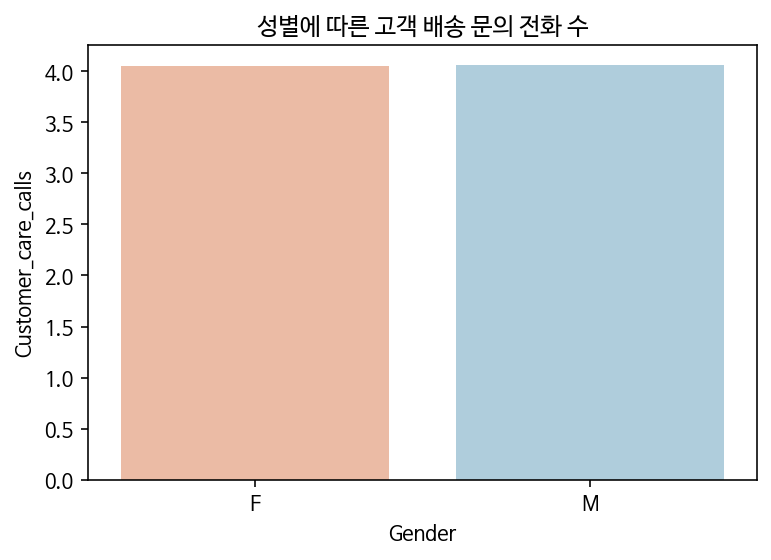

In [129]:
sns.barplot(data = data, x = 'Gender', y = 'Customer_care_calls', palette = "RdBu", ci = 0)
plt.title("성별에 따른 고객 배송 문의 전화 수")

***=> 고객 배송 문의 전화는 성별에 차이없이 4번 정도 한다.***

## 성별과 이전 구매 이력이 관련이 있을까?

In [130]:
data.groupby('Gender')['Prior_purchases'].mean()

Gender
F    3.581785
M    3.553172
Name: Prior_purchases, dtype: float64

Text(0.5, 1.0, '성별에 따른 이전 구매 이력')

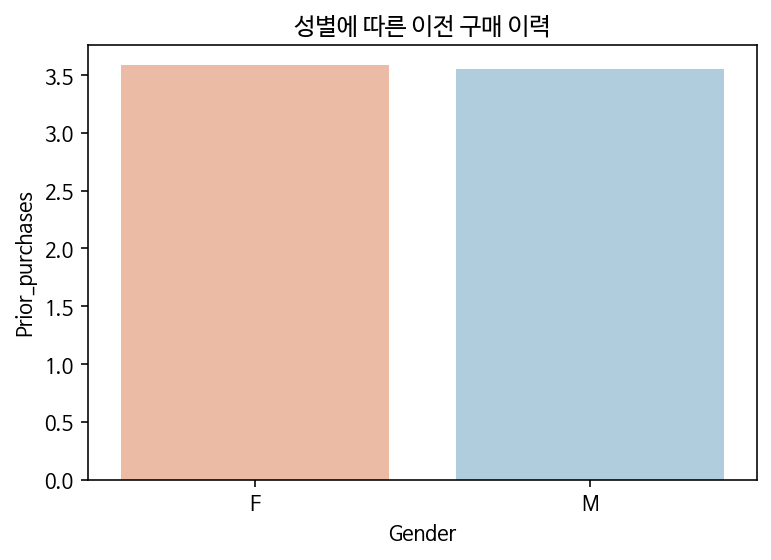

In [144]:
sns.barplot(data = data, x = 'Gender', y = 'Prior_purchases', palette = "RdBu", ci = 0)
plt.title("성별에 따른 이전 구매 이력")

***=> 성별에 차이없이 구매 이력은 3번***

## 창고 블럭과 이전 구매 이력이 관련이 있을까?

In [135]:
data.groupby('Warehouse_block')['Prior_purchases'].mean()

Warehouse_block
A    3.577741
B    3.575014
C    3.554828
D    3.601963
F    3.548009
Name: Prior_purchases, dtype: float64

Text(0.5, 1.0, '창고블럭에 따른 이전 구매 이력')

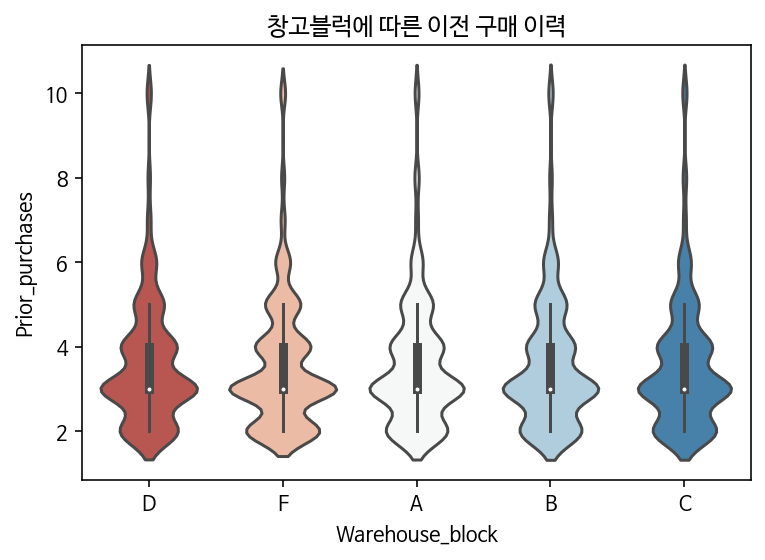

In [153]:
sns.violinplot(data = data, x = 'Warehouse_block', y = 'Prior_purchases', palette = "RdBu", ci = 0)
plt.title("창고블럭에 따른 이전 구매 이력")

***=> 창고 블럭과 관계없이 3번정도 구매 이력이 있다.***

## 상품의 중요도와 구매 이력이 관련이 있을까?

In [147]:
data.groupby('Product_importance')['Prior_purchases'].mean()

Product_importance
high      3.657173
low       3.528224
medium    3.593605
Name: Prior_purchases, dtype: float64

Text(0.5, 1.0, '상품 중요도에 따른 이전 구매 이력')

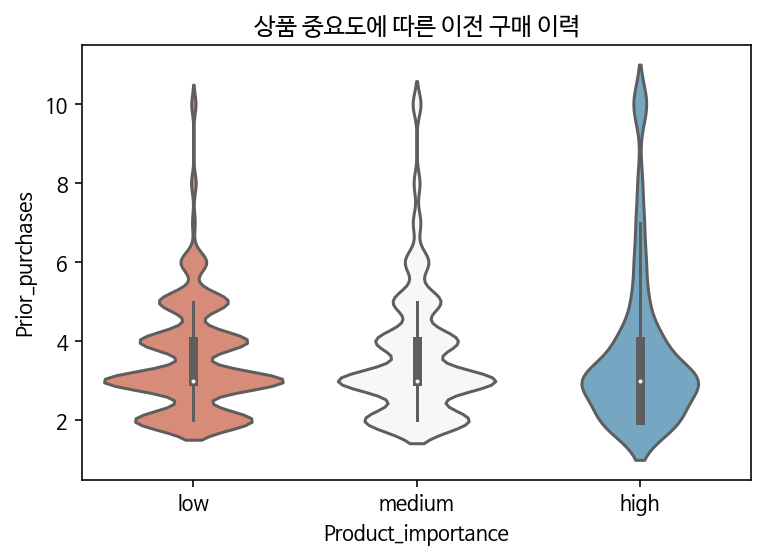

In [160]:
sns.violinplot(data = data, x = 'Product_importance', y = 'Prior_purchases', palette = "RdBu", ci = 0)
plt.title("상품 중요도에 따른 이전 구매 이력")

***=> 상품의 중요도와 상관없이 이전 구매이력은 3번 정도(이전에 만족도가 높다는 얘기지 않을까?)***

## 상품의 중요도와 배송 방법이 관련이 있을까?

## 상품의 중요도와 가격이 관련이 있을까?

In [154]:
data.groupby('Product_importance')['Cost_of_the_Product'].mean()

Product_importance
high      203.871308
low       212.059845
medium    209.382415
Name: Cost_of_the_Product, dtype: float64

Text(0.5, 1.0, '상품 중요도에 따른 가격')

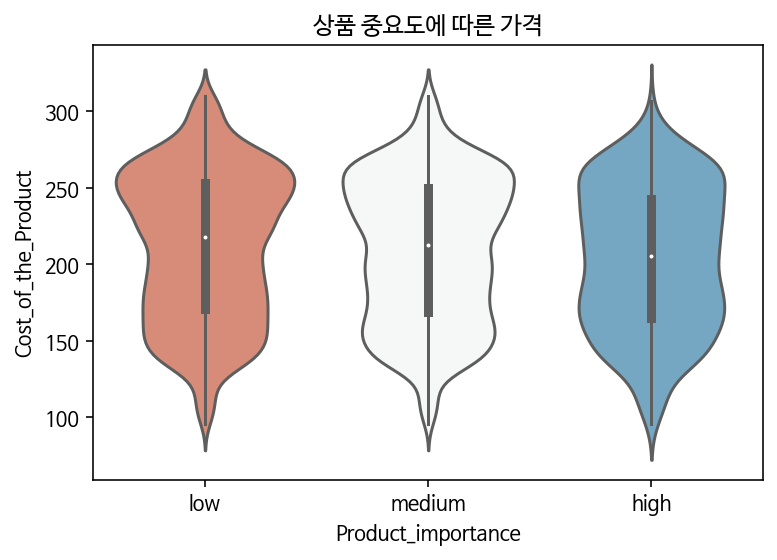

In [156]:
sns.violinplot(data = data, x = 'Product_importance', y = 'Cost_of_the_Product', palette = "RdBu", ci = 0)
plt.title("상품 중요도에 따른 가격")

## 상품의 무게와 중요도가 관련이 있을까?

In [157]:
data.groupby('Product_importance')['Weight_in_gms'].mean()

Product_importance
high      4005.551688
low       3497.488956
medium    3712.050484
Name: Weight_in_gms, dtype: float64

Text(0.5, 1.0, '상품 중요도에 따른 무게')

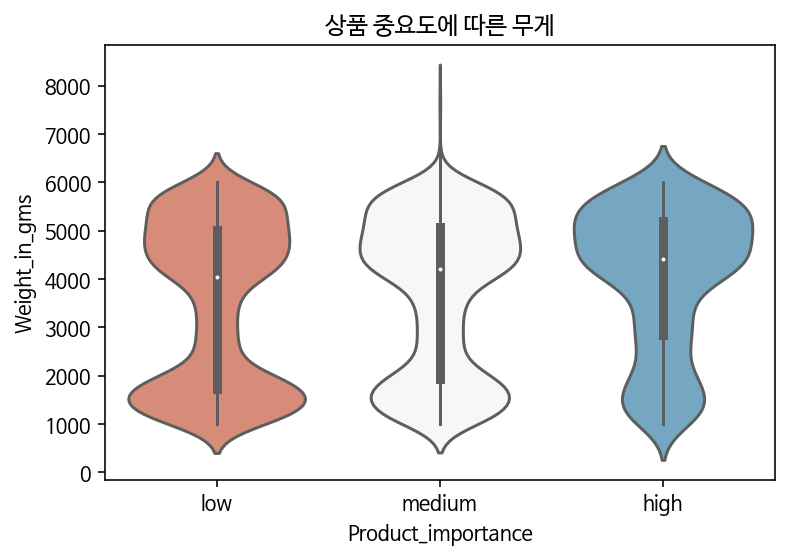

In [159]:
sns.violinplot(data = data, x = 'Product_importance', y = 'Weight_in_gms', palette = "RdBu", ci = 0)
plt.title("상품 중요도에 따른 무게")

창고블럭, 배송 방법, 제 시간 도착 여부

배송 방법과 제시간 도착 여부 파악

## 어떤 배송 방법이 제 시간에 가장 잘 도착할까? (예측)

상품 판매가 많은 거 

# **< 인사이트 >**

=> (창고 블럭) f 창고

=> (배송 방법)

=> (상품의 중요도)

=> (성별) 남, 녀

=> (할인 여부)

=> (무게)

=> (도착) 목표로

느낀 점 => 데이터의 불균형?이라고 해야하나 그런게 어느 정도 있어야 이 컬럼이랑 저 컬럼이랑 비교하면서 다른 결론이 나올 것이라고 생각한다. 하지만 이 데이터에서는 그런 부분이 다소 부족했던 것 같았고 혹시나 하는 마음에 계속 시도해봐도 처음 데이터 컬럼 하나하나 분석 정도로 알 수 있는 정도로 너무 균형있었던 것 같다. 뭔가 처음에 생각하던거랑 차이가 있어야 어? 이거 왜이러지 이러면서 검정하고자 했을 텐데,,, 그런게 없었던 것 같아 아쉬웠다.